# Calcul/Analyse préconception du système de vanne prise d'air

### Introduction:

Cette série de calculs vise à effectuer un prédimensionnement de notre futur système. Les calculs ont été élaborés en se référant aux cours de M. Binaud. L'utilisation de Python pour modéliser ces calculs nous permettra de déterminer le positionnement optimal de la vanne électrique.

### Sommaire:

1. Schéma cinématique.
2. Calcul du degré d'hyperstatisme.
3. Détermination de la loi d'entrée/sortie.
4. Estimation de l'effort en fonction de l'angle et de son emplacement sur le système longitudinal.

Nous vous invitons à explorer chacune de ces étapes pour obtenir une vision complète du prédimensionnement du système de la vanne de prise d'air. Les résultats détaillés de ces calculs sont disponibles dans le document Jupyter intitulé "Calcul_préconception".


## Shéma cinématique:

![Shéma cinématique](image/image.jpg)

## Hyperstatisme:

### degrée mobilité:

In [7]:
import math
from sympy import Symbol, Eq, solve
import numpy as np
import matplotlib.pyplot as plt

In [8]:
""" Mécanisme Plan """

Np = 4                          # nb de pièce avec bati
NL1 = 4                        # nb de liaisons à 1 degré de liberté
NL2 = 0                        # nb de liaisons à 1 degré de liberté

mu = 3*(Np-1)-2*NL1-2*NL2

print(f"Le degrée de mobilité du mécanisme plan est de {mu}")

Le degrée de mobilité du mécanisme plan est de 1


### degrée d'hyperstatisme:

In [9]:
Es = 6*(Np-1)
S = 4*5
me = Es-S
h = mu-me

print(f"Le degrée d'hyperstatisme du mécanisme plan est de {h}")

Le degrée d'hyperstatisme du mécanisme plan est de 3


## Loi entrée/sortie 

### Donnée d'entrée

In [20]:
l2 = 62.5    
l3 = 378
l4 = 20
xc = 442
yc = 61

e = 10
c2 = 31.67
c3 = 202.82
P2 = 347
P3 = 6330

In [12]:
def theta4(theta_2):
    """Fonctions de calcul d'angle de theta_4 suivant theta_2"""
    theta_2 = np.radians(theta_2)

    X = xc-l2*np.cos(theta_2)
    Y = yc-l2*np.sin(theta_2)

    A = X**2+2*X*l4+Y**2+l4**2-l3**2
    B = -4*Y*l4
    C = X**2-2*X*l4+Y**2+l4**2-l3**2

    delta = B**2-4*A*C

    t1 = (-B+np.sqrt(delta))/(2*A) 

    return np.degrees(2*np.arctan(t1))

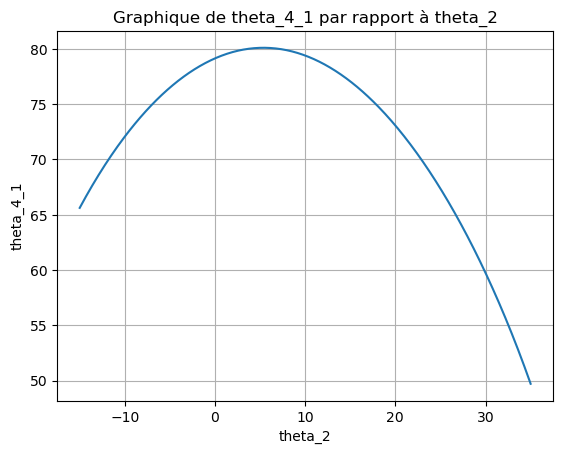

In [13]:
theta_2 = np.linspace(-15,35,500)

theta4(theta_2)

# Tracer le graphique
plt.plot(theta_2, theta4(theta_2))
plt.title('Graphique de theta_4_1 par rapport à theta_2')
plt.xlabel('theta_2')
plt.ylabel('theta_4_1')
plt.grid(True)
plt.show()

Ce graphique nous permet de fournir la loi d'entrée/sortie de theta 4 en fonction de theta 2. Cela nous permettra de calculer l'effort Fe ci-dessous.

## Calcul de FE

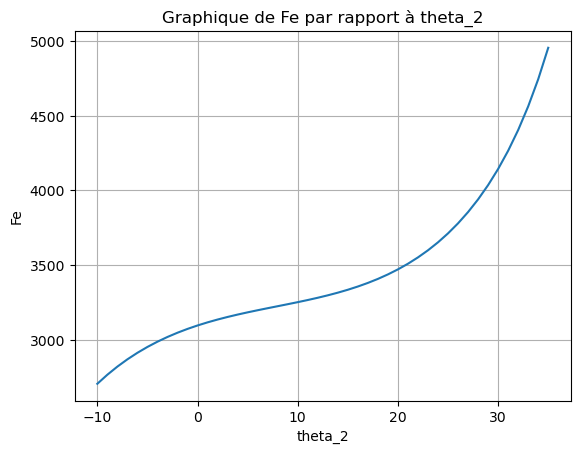

In [22]:
th_2_list = []
Fe_list = []

for i in range(-10,36):
  
        theta_2 = i
        theta_4 = np.radians(theta4(theta_2))
        theta_2 = np.radians(theta_2)


        X = xc-l2*np.cos(theta_2)

        theta_3 = np.arccos((X-l4*np.cos(theta_4))/l3)
        alpha_3 = np.radians(4.4)
        beta = np.radians(0)

        m11 = e*(np.cos(theta_3-alpha_3)*np.cos(beta) + np.sin(theta_3-alpha_3)*np.sin(beta))
        m12 = l3*(np.cos(theta_3)*np.sin(theta_4)-np.sin(theta_3)*np.cos(theta_4))

        m21 = (l2*np.cos(theta_2)+e*np.cos(theta_3-alpha_3))*np.cos(beta)+ (l2*np.sin(theta_2)+e*np.sin(theta_3-alpha_3))*np.sin(beta)
        m22 = (l2*np.cos(theta_2)+l3*np.cos(theta_3))*np.sin(theta_4)-(l2*np.sin(theta_2)+l3*np.sin(theta_3))*np.cos(theta_4)

        v1 = -c3*P3
        v2 = -c2*P2-P3*np.cos(theta_3-alpha_3)*(l2*np.cos(theta_2)+c3*np.cos(theta_3-alpha_3))-P3*np.sin(theta_3-alpha_3)*(l2*np.sin(theta_2)+c3*np.sin(theta_3-alpha_3))


        # Définie la matrice et le vecteur
        A = np.array([[m11, m12], [m21, m22]])
        B = np.array([v1, v2])

        # Résoud le système d'équations linéaires
        solution = np.linalg.solve(A, B)

        # Affiche la solution
        Fe, R4 = solution

        th_2_list.append(i) 
        Fe_list.append(Fe)

        liste_positif = [-x for x in Fe_list]    
    
# Trace le graphique
plt.plot(th_2_list,  liste_positif)
plt.title('Graphique de Fe par rapport à theta_2')
plt.xlabel('theta_2')
plt.ylabel('Fe')
plt.grid(True)
plt.show()


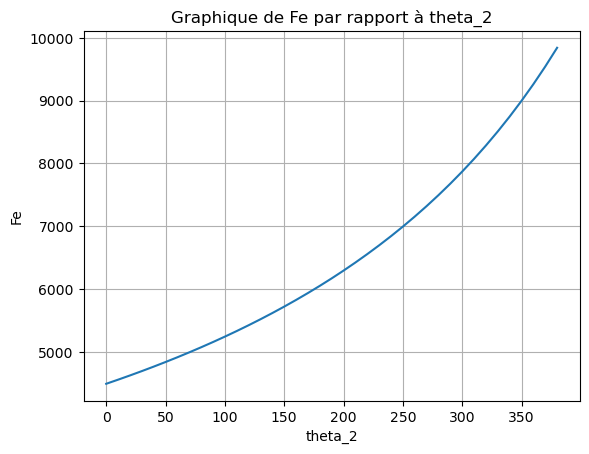

In [19]:
Fe_list = []
e_list = []
  
for e in range(0,381,10):
    
    theta_2 = 33
    theta_4 = np.radians(theta4(theta_2))
    theta_2 = np.radians(theta_2)

    X = xc-l2*np.cos(theta_2)

    theta_3 = np.arccos((X-l4*np.cos(theta_4))/l3)
    alpha_3 = np.radians(4.4)
    beta = np.radians(0)

    m11 = e*(np.cos(theta_3-alpha_3)*np.cos(beta) + np.sin(theta_3-alpha_3)*np.sin(beta))
    m12 = l3*(np.cos(theta_3)*np.sin(theta_4)-np.sin(theta_3)*np.cos(theta_4))

    m21 = (l2*np.cos(theta_2)+e*np.cos(theta_3-alpha_3))*np.cos(beta)+ (l2*np.sin(theta_2)+e*np.sin(theta_3-alpha_3))*np.sin(beta)
    m22 = (l2*np.cos(theta_2)+l3*np.cos(theta_3))*np.sin(theta_4)-(l2*np.sin(theta_2)+l3*np.sin(theta_3))*np.cos(theta_4)

    v1 = -c3*P3
    v2 = -c2*P2-P3*np.cos(theta_3-alpha_3)*(l2*np.cos(theta_2)+c3*np.cos(theta_3-alpha_3))-P3*np.sin(theta_3-alpha_3)*(l2*np.sin(theta_2)+c3*np.sin(theta_3-alpha_3))


    # Définie la matrice et le vecteur
    A = np.array([[m11, m12], [m21, m22]])
    B = np.array([v1, v2])

    # Résoud le système d'équations linéaires
    solution = np.linalg.solve(A, B)

    # Affiche la solution
    Fe, R4 = solution


    Fe_list.append(Fe)
    e_list.append(e)
    
    liste_positif = [-x for x in Fe_list]  

            
# Trace le graphique
plt.plot(e_list,liste_positif)
plt.title('Graphique de Fe par rapport à theta_2')
plt.xlabel('theta_2')
plt.ylabel('Fe')
plt.grid(True)
plt.show()

## Conclusion

En conclusion, la force est d'environ 4750 Newton, ce qui implique que l'action du vérin doit être supérieure à 4750 N pour permettre le déplacement de la vanne. Nous déterminons également que la position de l'attache de l'axe du vérin doit être la plus proche possible de la liaison entre les deux plaques (e = 0).